<center style="font-size:32px">TITANIC project</center>

<h1 style="font-size:20px">Importing Librairies & Packages :</h1>

In [59]:
%matplotlib inline
import numpy as np 
import pandas as pd 
pd.set_option("display.precision",2)

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

<h1 style="font-size:20px">Reading and spliting the data into train-test :</h1>

In [3]:
gender_submission = pd.read_csv("gender_submission.csv")
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")
training.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket   Fare Cabin Embarked  
0      0         A/5 21171   7.25   NaN        S  
1      0          PC 17599  71.28   C85        C  
2      0  STON/O2. 3101282   7.92   NaN        S  
3      0            113803  53.10  C123        S  
4      0            373450   8.05   NaN        S

In [4]:
training.describe()

PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33

In [5]:
print(gender_submission.keys())
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived'], dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<h1 style="font-size:20px">Cleaning the data :</h1>

In [6]:
def table_is_null(training, testing):
    print("Training the data frame : ")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing the data frame : ")
    print(pd.isnull(testing).sum())

table_is_null(training, testing)

Training the data frame : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing the data frame : 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

table_is_null(training, testing)

Training the data frame : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing the data frame : 
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


In [8]:
copie = training.copy()
copie.dropna(inplace = True)
sns.distplot(copie["Age"])

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_15308\579185877.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copie["Age"])


<Axes: xlabel='Age', ylabel='Density'>

In [9]:
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

table_is_null(training, testing)

Training the data frame : 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing the data frame : 
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


<h1 style="font-size:20px">Perform exploratory data analysis :</h1>

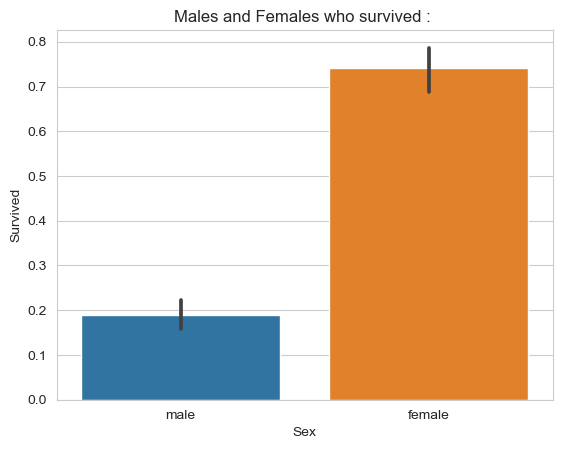

The total people survived is : 342
The proportion of survived males : 31.871345029239766 %
The proportion of survived females : 68.12865497076024 %


In [10]:
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Males and Females who survived : ")
plt.show()

survived_females_in_total = training[training.Sex == "female"]["Survived"].sum()
survived_males_in_total = training[training.Sex == "male"]["Survived"].sum()

print("The total people survived is : " + str((survived_females_in_total + survived_males_in_total)))
print("The proportion of survived males :",(survived_males_in_total/(survived_females_in_total + survived_males_in_total))*100, "%")
print("The proportion of survived females :",(survived_females_in_total/(survived_females_in_total + survived_males_in_total))*100, "%")

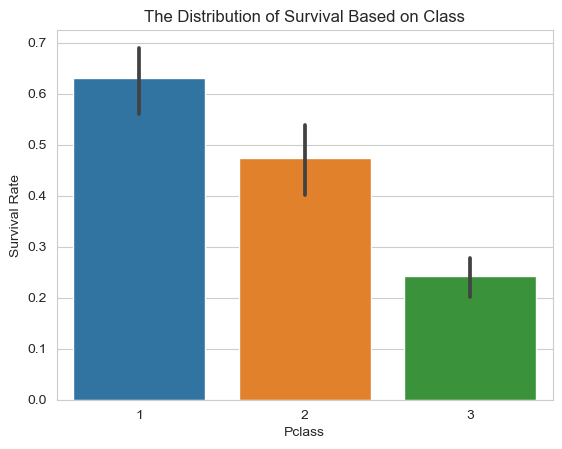

The total people survived is: 342
The proportion of 3rd Class Passengers who survived: 34.7953216374269 %
The proportion of 2nd Class Passengers who survived: 25.438596491228072 %
The proportion of 1st Class Passengers who survived: 39.76608187134503 %


In [11]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("The Distribution of Survival Based on Class")
plt.show()

survived_in_total_three = training[training.Pclass == 3]["Survived"].sum()
survived_in_total_two = training[training.Pclass == 2]["Survived"].sum()
survived_in_total_one = training[training.Pclass == 1]["Survived"].sum()
survived_in_total_class = survived_in_total_one + survived_in_total_two + survived_in_total_three

print("The total people survived is: " + str(survived_in_total_class))
print("The proportion of 3rd Class Passengers who survived:",(survived_in_total_three/survived_in_total_class)*100,"%")
print("The proportion of 2nd Class Passengers who survived:",(survived_in_total_two/survived_in_total_class)*100,"%")
print("The proportion of 1st Class Passengers who survived:",(survived_in_total_one/survived_in_total_class)*100,"%")

Text(0.5, 1.0, 'This is the survival rates based on gender and class')

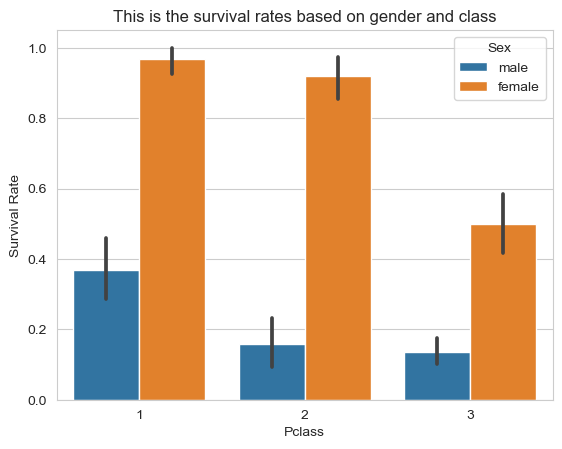

In [12]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("This is the survival rates based on gender and class")

In [13]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("This is the survival rates based on gender and class")

Text(0.5, 1.0, 'This is the survival rates based on gender and class')

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_15308\1865508359.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived_ages, kde=False)
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_15308\1865508359.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_survived_ages, kde=Fal

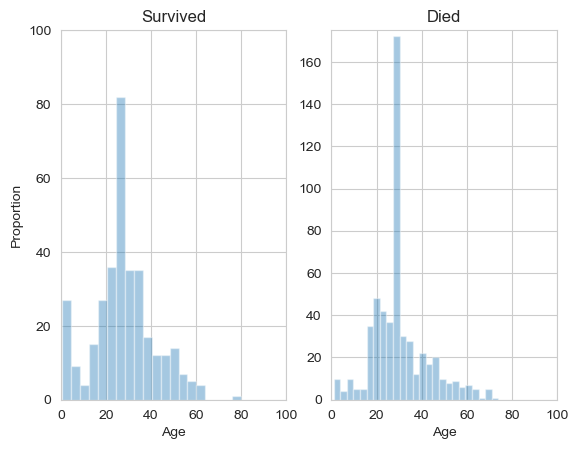

In [14]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 175])
plt.title("Died")
plt.show()

<h1 style="font-size:20px">Build the model :</h1>

<h1 style="font-size:14px">Because values in the Sex and Embarked columns are categorical values, we have to represent these strings as numerical values in order to perform our classification with our model. </h1>

In [36]:
training.sample(5)

PassengerId  Survived  Pclass                    Name Sex   Age  SibSp  \
762          763         1       3   Barah, Mr. Hanna Assi   0  20.0      0   
811          812         0       3       Lester, Mr. James   0  39.0      0   
555          556         0       1      Wright, Mr. George   0  62.0      0   
450          451         0       2   West, Mr. Edwy Arthur   0  36.0      1   
864          865         0       2  Gill, Mr. John William   0  24.0      0   

     Parch   Fare Embarked  
762      0   7.23        1  
811      0  24.15        0  
555      0  26.55        0  
450      2  27.75        0  
864      0  13.00        0

In [37]:
testing.sample(5)

PassengerId  Pclass                                      Name Sex   Age  \
220         1112       2            Duran y More, Miss. Florentina   1  30.0   
387         1279       2                           Ashby, Mr. John   0  57.0   
6            898       3                      Connolly, Miss. Kate   1  30.0   
369         1261       2             Pallas y Castello, Mr. Emilio   0  29.0   
32           924       3  Dean, Mrs. Bertram (Eva Georgetta Light)   1  33.0   

     SibSp  Parch   Fare Embarked  
220      1      0  13.86        1  
387      0      0  13.00        0  
6        0      0   7.63        2  
369      0      0  13.86        1  
32       1      2  20.57        0

<h1 style="font-size:14px">We change Sex to binary, as either 1 for female or 0 for male. We do the same for Embarked. We do this same process on both the training and testing set to prepare our data for Machine Learning.</h1>

In [33]:
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2

In [38]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare"]
X_train = training[features] #define training features set
y_train = training["Survived"] #define training label set
X_test = testing[features] #define testing features set
#we don't have y_test, that is what we're trying to predict with our model

In [39]:
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [60]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print('RandomForest model accuracy on train set: ',acc_rf)

RandomForest model accuracy on train set:  0.8547486033519553


<h1 style="font-size:16px">There are other model but the Randomforest model is the best in term of accuracy. The other models are :SVC model,LinearSVC model,LogisitcRegression model, KNeighbors model, GaussianNB model, DecisionTree model, XGBosst model and other.</h1>

<h1 style="font-size:20px">Evaluating the model :</h1>

In [44]:
model_performance = pd.DataFrame({
    "Model": [ "Random Forest"],
    "Accuracy": [ acc_rf]
})
model_performance.sort_values(by="Accuracy", ascending=False)

Model  Accuracy
0  Random Forest      0.85

In [47]:
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              #"max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=3, n_estimators=7)

In [55]:
rf_clf = grid_cv.best_estimator_

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=7)

In [58]:
N, train_score, val_score = learning_curve(rf_clf, X_train, y_train, train_sizes = np.linspace(0.1,1,10),cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1),label='validation')
plt.xlabel('train sizes')
plt.legend()

[ 71 142 213 284 356 427 498 569 640 712]
